## K-means Clustering

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

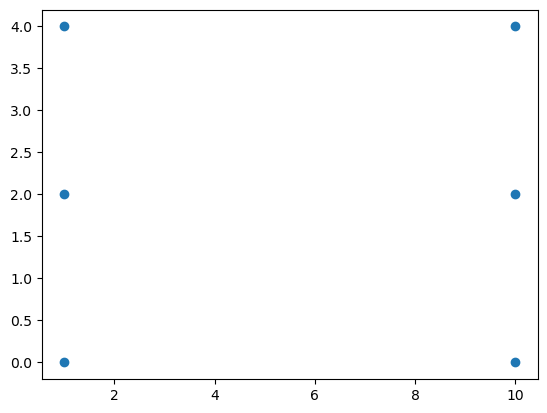

In [3]:
plt.scatter(X[:,0], X[:,1])

In [5]:
# pay attention to the fit method
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)

In [6]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [7]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [8]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [9]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [1, 1, 1, 2, 2, 2]
# 100%, purity

## Another example

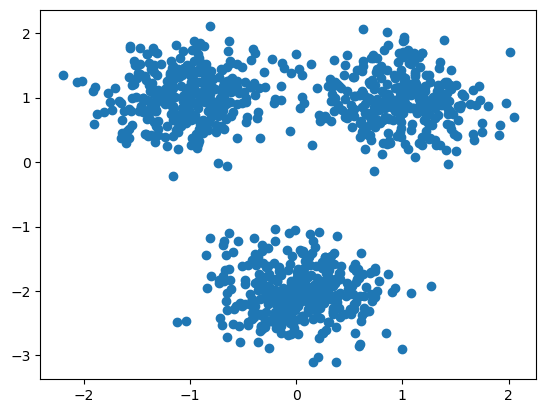

In [10]:
m,n = (1000, 2)
np.random.seed(0)

X = 0.4*np.random.randn(m,n)
Mu0 = np.array([[0,-2], [-1,1], [1,1]])

X += Mu0[np.random.choice(np.arange(3), m),:] # move points by Mu0

plt.scatter(X[:,0], X[:,1])

### Visualize K-Means clustering process

In [11]:
colors = np.array(["C0", "C1", "C2"])

def kmeans_visualize(X, k, max_iter=10, rand_seed=0):
    f,ax = plt.subplots(max_iter, figsize=(6.0, 4.6*max_iter))
    np.random.seed(rand_seed)
    
    # Randomly initialize k cluster centroids
    Mu = X[np.random.choice(X.shape[0],k),:] 
    
    # use for loop to repeat the following process until reach the limit
    for i in range(max_iter): 
        
        # assign each data to the closest cluster centroids
        D = -2*X@Mu.T + (X**2).sum(axis=1)[:,None] + (Mu**2).sum(axis=1)
        y = np.argmin(D,axis=1)
        
        # visualize the data with the color of its belonging cluster
        ax[i].scatter(X[:,0], X[:,1], c=colors[y])
        
        # visualize the current cluster centroid
        ax[i].scatter(Mu[:,0], Mu[:,1], c='k') 
        
        # Re-compute the cluster centroids
        Mu = np.array([np.mean(X[y==i],axis=0) for i in range(k)]) 
        
    # calculate the final loss/error
    loss = np.linalg.norm(X - Mu[np.argmin(D,axis=1),:])**2/X.shape[0]
    
    return Mu, y, loss

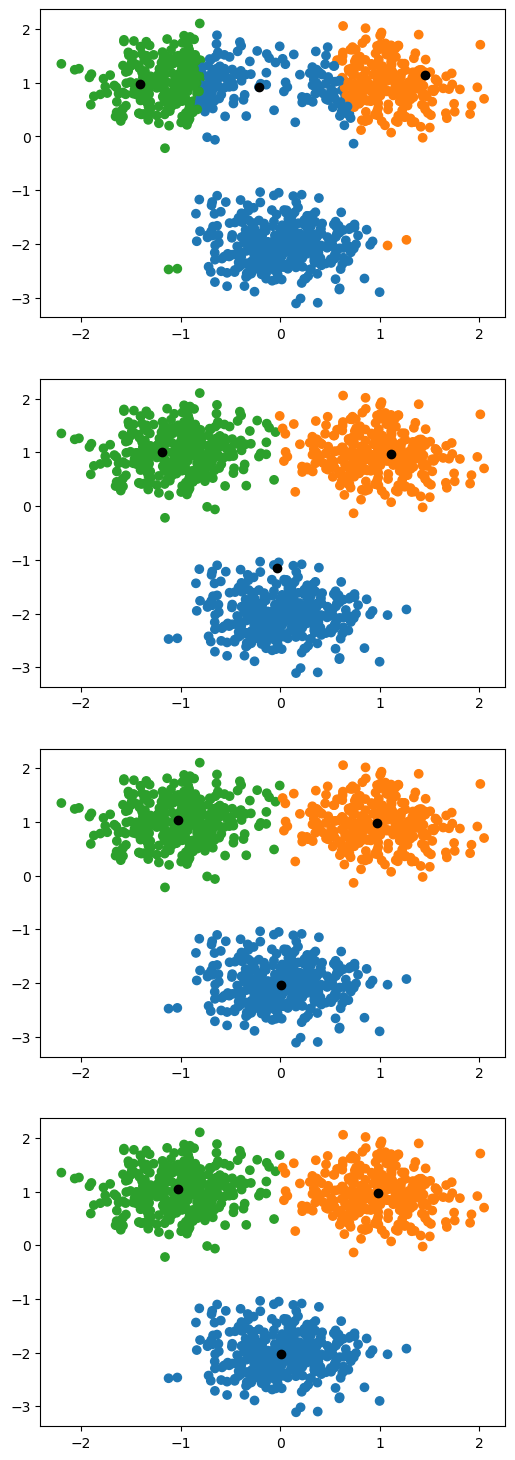

In [13]:
kmeans_visualize(X, k=3, max_iter=4, rand_seed = 3);

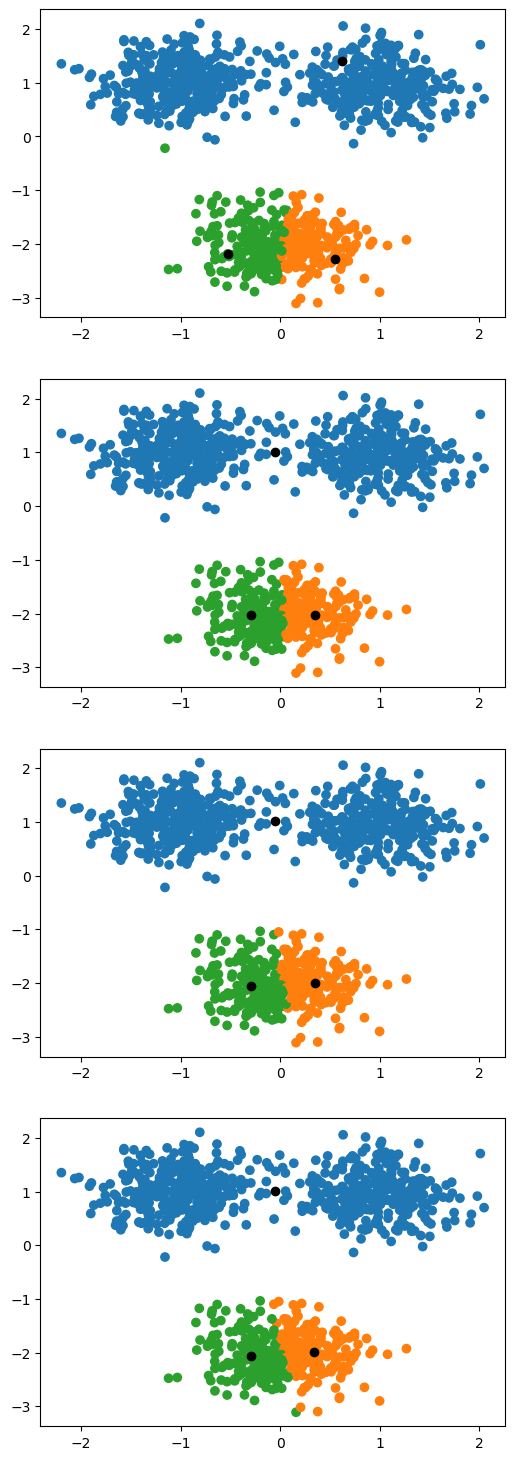

In [15]:
kmeans_visualize(X, k=3, max_iter=4, rand_seed=13);

**Question:** what is the difference between the above two clustering process? what factors cause such differences?

In [ ]:
### your answer here